In [5]:
!pip install tensorflow

In [7]:
!pip show tensorflow


Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [2]:
# Importer les bibliothèques nécessaires pour le prétraitement des données
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Importer TensorFlow et les composants nécessaires pour créer le modèle de réseau de neurones
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt

# Étape d'importation terminée.
# Passons à l'étape suivante : Prétraitement des données.


In [3]:
# Importer TensorFlow pour vérifier si l'installation est bien reconnue
import tensorflow as tf

# Afficher la version de TensorFlow pour confirmer l'importation réussie
print("Version de TensorFlow :", tf.__version__)

"""ce code est une simple vérification pour garantir que TensorFlow est correctement
installé et fonctionnel avant de poursuivre le développement ou l'entraînement d'un modèle de machine learning."""


Version de TensorFlow : 2.17.1


In [4]:
# Charger le fichier CSV contenant les données
from google.colab import files
uploaded = files.upload("/Users/bakayokomoussa/Downloads/Project_PythonIA_Group_IPSSI-main/cars.csv")


Saving cars.csv to /Users/bakayokomoussa/Downloads/Project_PythonIA_Group_IPSSI-main/cars.csv/cars.csv


In [5]:
uploaded
#uploaded est un dictionnaire contenant le ou les fichiers que vous avez téléchargés.

{'/Users/bakayokomoussa/Downloads/Project_PythonIA_Group_IPSSI-main/cars.csv/cars.csv': b"mileage,make,model,fuel,gear,offerType,price,hp,year\n235000,BMW,316,Diesel,Manual,Used,6800,116,2011\n92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122,2011\n149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160,2011\n96200,Renault,Megane,Gasoline,Manual,Used,6950,110,2011\n156000,Peugeot,308,Gasoline,Manual,Used,6950,156,2011\n147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99,2011\n91894,Renault,Scenic,Diesel,Manual,Used,6970,131,2011\n127500,Opel,Zafira,Gasoline,Manual,Used,6972,116,2011\n115000,Mazda,3,Gasoline,Automatic,Used,6980,150,2011\n104,Ford,Transit,Diesel,Manual,Used,6990,86,2011\n59580,Opel,Meriva,Diesel,Automatic,Used,6990,101,2011\n84000,Volkswagen,Golf,Gasoline,Manual,Used,6990,105,2011\n427000,Mercedes-Benz,E 250,Diesel,Automatic,Used,6990,204,2011\n109000,Chevrolet,Orlando,Gasoline,Manual,Used,6990,141,2011\n194020,Audi,A4,Diesel,Manual,Used,6999,120,2011\n72000,Volkswagen

In [6]:
data = pd.read_csv(list(uploaded.keys())[0])

"""uploaded est un dictionnaire contenant les fichiers téléchargés.
uploaded.keys() renvoie une liste des noms des fichiers téléchargés.
list(uploaded.keys())[0] extrait le nom du premier fichier de la liste.
pd.read_csv() lit ce fichier CSV et le stocke dans le DataFrame data."""

In [7]:
data

mileage        make   model               fuel    gear       offerType  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46400       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46401       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46402       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46403       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46404       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   

       price     hp  year  
0       6800  116.0  2011  
1       6877  122.0  2011  
2       6900  160.0  2011  
3       6950  110.0  2011  
4       6950  156.0  2011  
...      ...    ...   ...  
46400  12990   71.0  2021  
46401  12990   71.0  2021  
46402  12990   71.0  2021  
46403  12990   71.0  2021  
46404  12990   71.0  2021  

[46405 rows x 9 columns]

In [30]:
# Afficher un aperçu des données pour comprendre leur structure
data.head()

mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011

from matplotlib import pyplot as plt
_df_0['mileage'].plot(kind='hist', bins=20, title='mileage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['hp'].plot(kind='hist', bins=20, title='hp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('make').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('fuel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='mileage', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='price', y='hp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price']
  ys = series['mileage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('price', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('make')):
  _plot_series(series, series_name, i)
  fig.legend(title='make', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('mileage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price']
  ys = series['mileage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('price', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('mileage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price']
  ys = series['mileage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('price', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('fuel')):
  _plot_series(series, series_name, i)
  fig.legend(title='fuel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('mileage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price']
  ys = series['hp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('price', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('make')):
  _plot_series(series, series_name, i)
  fig.legend(title='make', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('hp')

from matplotlib import pyplot as plt
_df_12['mileage'].plot(kind='line', figsize=(8, 4), title='mileage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['hp'].plot(kind='line', figsize=(8, 4), title='hp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['model'].value_counts()
    for x_label, grp in _df_15.groupby('make')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('make')
_ = plt.ylabel('model')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['fuel'].value_counts()
    for x_label, grp in _df_16.groupby('model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('model')
_ = plt.ylabel('fuel')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['make'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='mileage', y='make', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='mileage', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['fuel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='mileage', y='fuel', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['make'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='price', y='make', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
# Définir les colonnes numériques et catégorielles
"""numeric_features : Cette liste contient les noms des colonnes qui représentent des caractéristiques numériques (mileage, hp, et year).
categorical_features : Cette liste contient les noms des colonnes représentant des caractéristiques catégorielles (make, model, fuel, gear, offerType)."""
numeric_features = ['mileage', 'hp', 'year']
categorical_features = ['make', 'model', 'fuel', 'gear', 'offerType']


"""Pipeline : Enchaîne les étapes de transformation.
SimpleImputer(strategy='mean') : Remplit les valeurs manquantes par la moyenne des valeurs de chaque colonne numérique.
StandardScaler() : Normalise les caractéristiques numériques (moyenne de 0 et écart type de 1), ce qui est souvent requis pour un meilleur apprentissage du modèle."""
# Pipeline pour les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputer les valeurs manquantes avec la moyenne
    ('scaler', StandardScaler())  # Normaliser les données numériques
])


"""SimpleImputer(strategy='most_frequent') : Remplit les valeurs manquantes dans les colonnes catégorielles avec la valeur la plus fréquente.
OneHotEncoder(handle_unknown='ignore') : Encode chaque catégorie en binaire (0 ou 1). handle_unknown='ignore' permet d'ignorer les catégories inconnues pendant la transformation."""
# Pipeline pour les colonnes catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputer les valeurs manquantes avec la valeur la plus fréquente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoder les variables catégorielles
])


"""ColumnTransformer : Combine différentes transformations en une seule étape. Cela permet d'appliquer les transformations définies (imputation, normalisation, encodage) aux colonnes correspondantes :
('num', numeric_transformer, numeric_features) : Applique numeric_transformer aux colonnes numériques.
('cat', categorical_transformer, categorical_features) : Applique categorical_transformer aux colonnes catégorielles."""
# Combiner les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


"""X : Contient toutes les colonnes sauf price, qui sont les caractéristiques pour l'entraînement.
y : Colonne cible (price) que l'on veut prédire."""
# Séparer les données en caractéristiques (X) et cible (y)
X = data.drop(columns=['price'])
y = data['price']


#fit_transform : Ajuste le preprocessor aux données (fit) et applique les transformations (transform). Cela retourne une version prétraitée de X.
# Appliquer les transformations sur les caractéristiques X
X_preprocessed = preprocessor.fit_transform(X)

#train_test_split : Divise les données en ensembles d'entraînement (80%) et de test (20%). random_state=42 assure la reproductibilité des résultats.
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Prétraitement terminé.
# Passons à l'étape suivante : Construction du modèle de réseau de neurones.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/150
929/929 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 98.7103 - mae: 9.2843 - mse: 87.6810 - val_loss: 88.9881 - val_mae: 8.9490 - val_mse: 80.2507 - learning_rate: 5.0000e-05
Epoch 2/150
929/929 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 82.1349 - mae: 8.5402 - mse: 73.7106 - val_loss: 67.6970 - val_mae: 7.7336 - val_mse: 59.9912 - learning_rate: 5.0000e-05
Epoch 3/150
929/929 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 62.4333 - mae: 7.3505 - mse: 54.8974 - val_loss: 45.9179 - val_mae: 6.2172 - val_mse: 38.8363 - learning_rate: 5.0000e-05
Epoch 4/150
929/929 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 42.4276 - mae: 5.8807 - mse: 35.4754 - val_loss: 27.6586 - val_mae: 4.5739 - val_mse: 21.0777 - learning_rate: 5.0000e-05
Epoch 5/150
929/929 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 25.3607 - mae: 4.2564 - mse: 18.8968 - val_loss: 14.9622 - val_mae: 2.9549 - val_mse: 8.8499 - learning_rate: 5.0000e-05
Epoch 6/150
929/929 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 13.8141 - mae

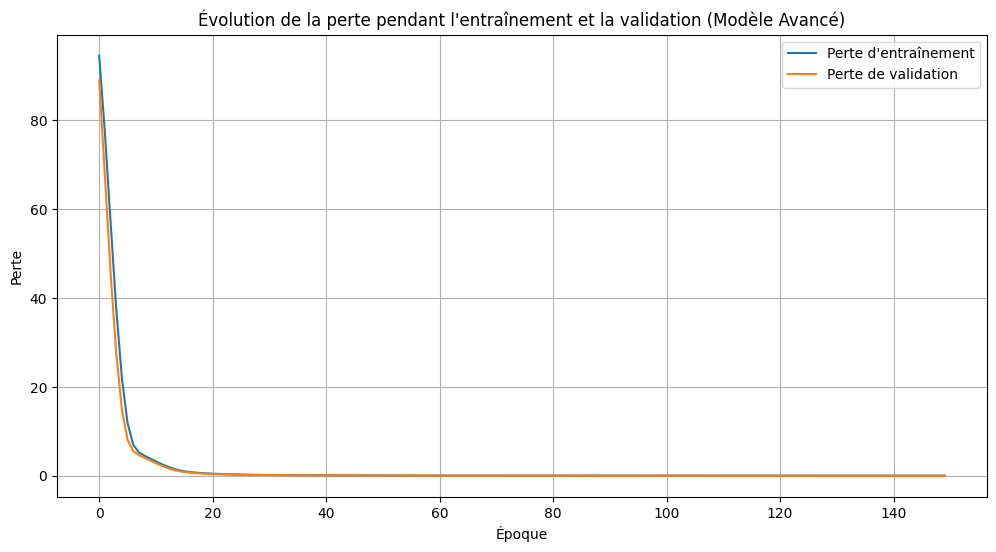

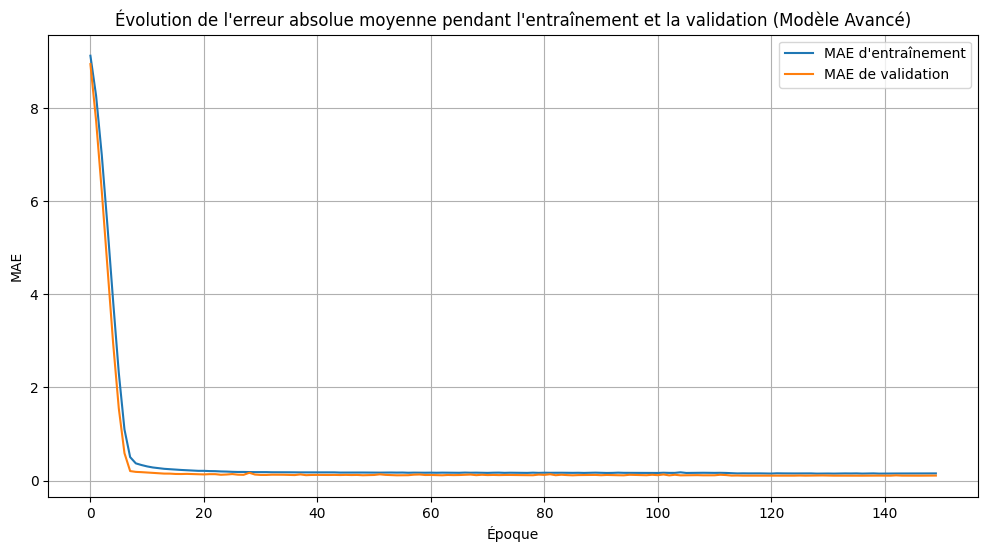

In [11]:
import numpy as np

# Appliquer une transformation logarithmique sur la variable cible (pour stabiliser les prix élevés)
"""np.log1p(y) : Applique une transformation logarithmique pour compresser la distribution des prix.
Cela aide à réduire l'impact des valeurs très élevées et permet au modèle de mieux généraliser.
La fonction log1p est utilisée pour éviter les problèmes liés à des valeurs égales à zéro."""
y_log = np.log1p(y)

# Diviser les données en ensembles d'entraînement et de test après transformation
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_log, test_size=0.2, random_state=42)

# Définir un modèle amélioré avec régularisation L2 et un taux d'apprentissage réduit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

"""Sequential : Définit un modèle où chaque couche est empilée séquentiellement.
Input : Spécifie la forme d'entrée du modèle (nombre de caractéristiques dans X_train).
Dense(512, kernel_regularizer=l2(0.01)) : Une couche entièrement connectée avec 512 neurones, avec une régularisation L2 (pénalité sur les poids pour éviter le surapprentissage).
LeakyReLU(alpha=0.1) : Fonction d'activation qui permet une petite valeur de gradient lorsque l'entrée est négative (évite les neurones morts).
BatchNormalization() : Normalise les activations de chaque couche pour stabiliser et accélérer l'entraînement.
Dropout(0.5) : Désactive aléatoirement 50% des neurones pendant l'entraînement pour éviter le surapprentissage."""
# Définir le modèle amélioré
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Dense(1)  # Couche de sortie pour une tâche de régression
])

"""optimizer=Adam(learning_rate=0.00005) : Utilise l'optimiseur Adam avec un faible taux d'apprentissage (0.00005) pour un ajustement précis.
loss='mean_squared_error' : Fonction de perte utilisée pour la régression (MSE).
metrics=['mae', 'mse'] : Suit l'erreur absolue moyenne (MAE) et l'erreur quadratique moyenne (MSE) pendant l'entraînement."""
# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='mean_squared_error', metrics=['mae', 'mse'])

"""EarlyStopping : Arrête l'entraînement si la perte de validation ne s'améliore plus après 30 époques (évite de surentraîner le modèle).
ReduceLROnPlateau : Réduit le taux d'apprentissage si la perte de validation ne s'améliore plus après 10 époques (pour affiner l'optimisation)."""
# Callbacks pour améliorer l'entraînement
callbacks = [
    EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6, verbose=1)
]

"""fit : Entraîne le modèle sur les données d'entraînement (X_train, y_train).
validation_split=0.2 : Utilise 20% de l'ensemble d'entraînement pour la validation.
epochs=150 : Nombre d'itérations sur l'ensemble de données.
batch_size=32 : Nombre d'échantillons par mise à jour des poids."""
# Entraîner le modèle
# Courbe de l'évolution de la perte pendant l'entraînement
# Entraîner de nouveau le modèle et capturer l'historique dans 'history_advanced'
history_advanced = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32, callbacks=callbacks, verbose=1)

# Visualisation de la performance du modèle

#Trace l'évolution de la perte (loss) pour l'entraînement et la validation au cours des époques, permettant de visualiser la convergence du modèle.
# Courbe de l'évolution de la perte pendant l'entraînement et la validation
plt.figure(figsize=(12, 6))
plt.plot(history_advanced.history['loss'], label='Perte d\'entraînement')
plt.plot(history_advanced.history['val_loss'], label='Perte de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la perte pendant l\'entraînement et la validation (Modèle Avancé)')
plt.legend()
plt.grid(True)
plt.show()


#Trace l'évolution de la MAE pendant l'entraînement et la validation. Cela permet de vérifier si le modèle surapprend ou sous-apprend.
# Courbe de l'évolution de l'erreur absolue moyenne (MAE) pendant l'entraînement et la validation
plt.figure(figsize=(12, 6))
plt.plot(history_advanced.history['mae'], label='MAE d\'entraînement')
plt.plot(history_advanced.history['val_mae'], label='MAE de validation')
plt.xlabel('Époque')
plt.ylabel('MAE')
plt.title('Évolution de l\'erreur absolue moyenne pendant l\'entraînement et la validation (Modèle Avancé)')
plt.legend()
plt.grid(True)
plt.show()


"""Résumé
Le code présente un processus complet de création d'un modèle de réseau de neurones pour la prédiction des prix des voitures.
Les étapes de prétraitement, de définition et d'entraînement du modèle sont soigneusement conçues pour réduire le surapprentissage et améliorer la généralisation.
Le modèle utilise une régularisation L2, des techniques de normalisation, et des callbacks pour optimiser la performance."""


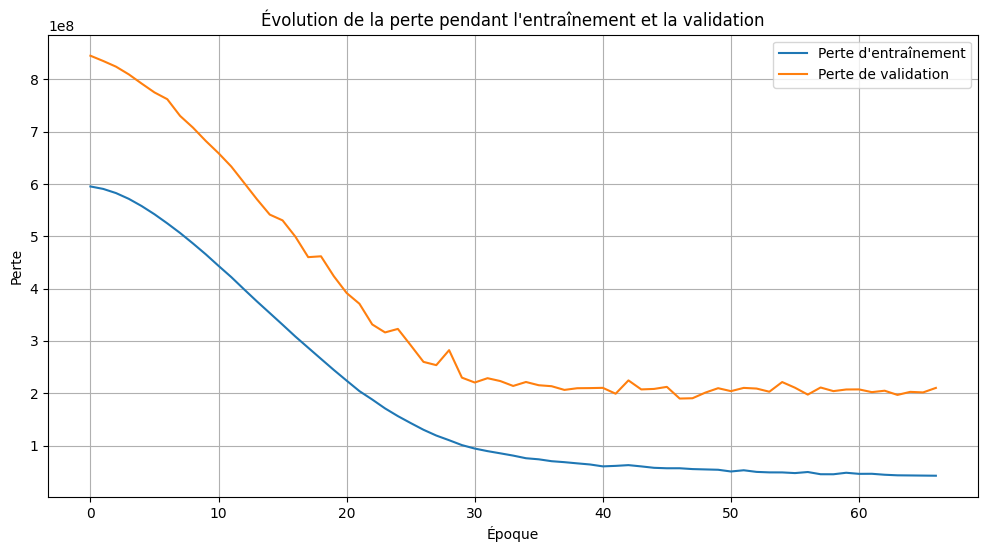

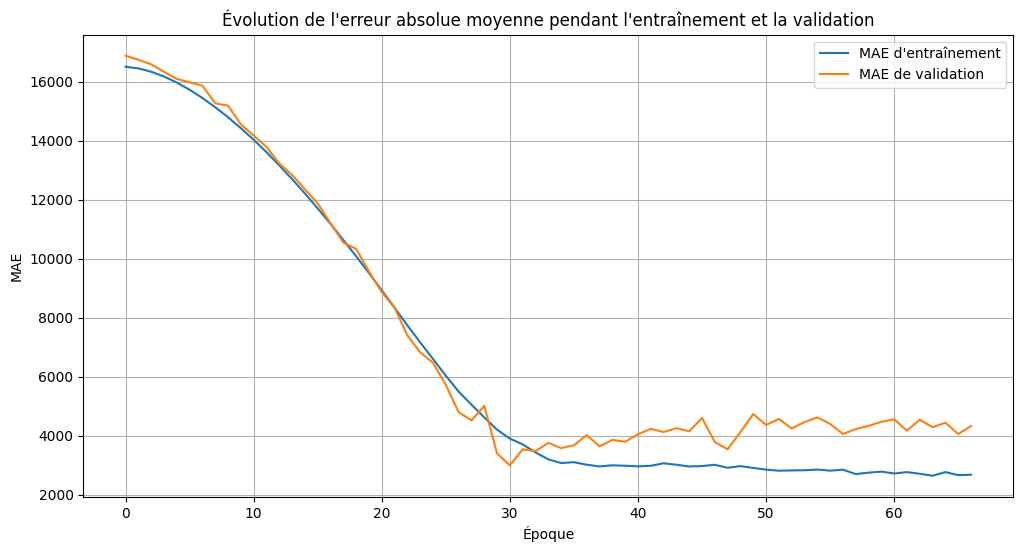

In [35]:
"""import matplotlib.pyplot as plt

# Visualisation de la performance du modèle

# Courbe de l'évolution de la perte pendant l'entraînement et la validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la perte pendant l\'entraînement et la validation')
plt.legend()
plt.grid(True)
plt.show()

# Courbe de l'évolution de l'erreur absolue moyenne (MAE) pendant l'entraînement et la validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='MAE d\'entraînement')
plt.plot(history.history['val_mae'], label='MAE de validation')
plt.xlabel('Époque')
plt.ylabel('MAE')
plt.title('Évolution de l\'erreur absolue moyenne pendant l\'entraînement et la validation')
plt.legend()
plt.grid(True)
plt.show()
""""

Epoch 1/150
465/465 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 554120128.0000 - mae: 16440.2051 - mse: 554120128.0000 - val_loss: 845112192.0000 - val_mae: 16875.0625 - val_mse: 845112192.0000 - learning_rate: 0.0010
Epoch 2/150
465/465 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 655779776.0000 - mae: 16420.3926 - mse: 655779776.0000 - val_loss: 835032192.0000 - val_mae: 16738.4941 - val_mse: 835032192.0000 - learning_rate: 0.0010
Epoch 3/150
465/465 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 577938560.0000 - mae: 16452.6738 - mse: 577938560.0000 - val_loss: 824156992.0000 - val_mae: 16583.1836 - val_mse: 824156992.0000 - learning_rate: 0.0010
Epoch 4/150
465/465 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 564739904.0000 - mae: 16242.1426 - mse: 564739904.0000 - val_loss: 809387136.0000 - val_mae: 16329.1221 - val_mse: 809387136.0000 - learning_rate: 0.0010
Epoch 5/150
465/465 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 561246080.0000 - mae: 16120.4570 - mse: 561246080.0000 - val_loss: 79187

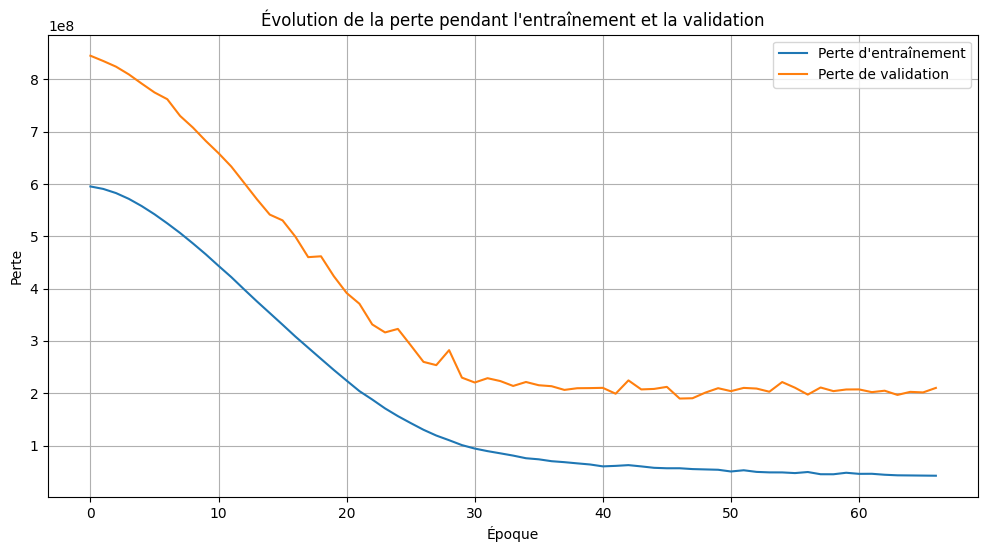

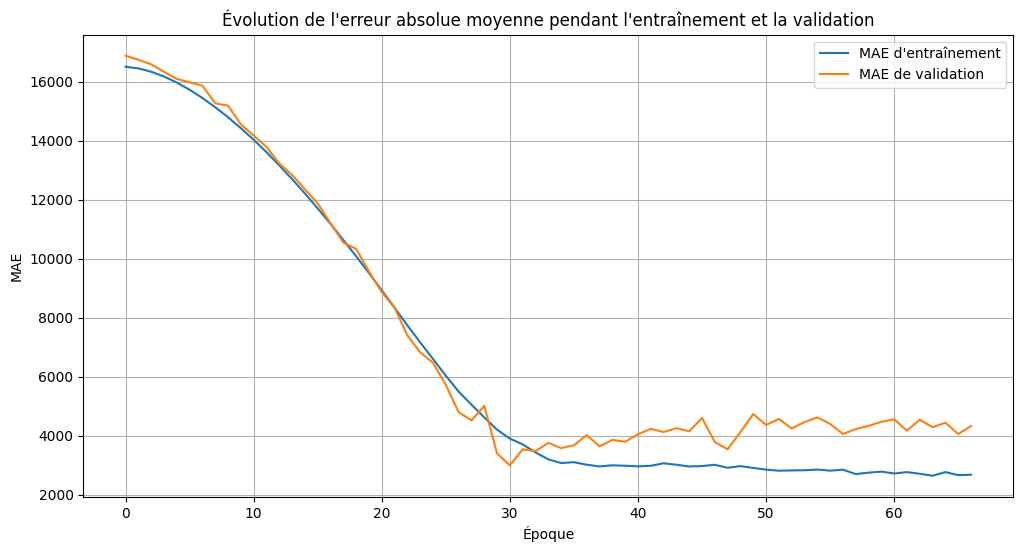

291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 49623360.0000 - mae: 3573.0132 - mse: 49623360.0000


[77703384.0, 3657.217041015625, 77703384.0]

In [22]:
"""# Callbacks pour éviter le surapprentissage et améliorer la performance du modèle
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)
]

# Entraîner le modèle
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=64, callbacks=callbacks, verbose=1)

# Visualisation de la performance

# Courbe de l'évolution de la perte pendant l'entraînement
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la perte pendant l\'entraînement et la validation')
plt.legend()
plt.grid(True)
plt.show()

# Courbe de l'évolution de l'erreur absolue moyenne (MAE) pendant l'entraînement
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='MAE d\'entraînement')
plt.plot(history.history['val_mae'], label='MAE de validation')
plt.xlabel('Époque')
plt.ylabel('MAE')
plt.title('Évolution de l\'erreur absolue moyenne pendant l\'entraînement et la validation')
plt.legend()
plt.grid(True)
plt.show()

# Évaluer les performances sur l'ensemble de test
performance = model.evaluate(X_test, y_test, verbose=1)
performance
"""""